## Observations and Insights 

Observations:

1) The number of male and female mice was evenly balanced
2) Capomulin and Ramicane are the two most effective drugs at reducing tumors (based on final tumor volumes)
3) Capomulin and Ramicane are the two mose well studied drugs (based on total timepoints)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

combined_data= pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

len(mouse_metadata)


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_IDs= []



for mouse in mouse_metadata["Mouse ID"]:
    
    mouse_ID= mouse
    
    single_id= combined_data.loc[combined_data["Mouse ID"] == mouse_ID, :]

    if single_id["Timepoint"].is_unique is False:
        
        duplicate_IDs.append(mouse)

duplicate_IDs

['g989']

In [4]:
combined_clean= combined_data.drop(combined_data.loc[combined_data["Mouse ID"] == "g989"].index)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_data.loc[combined_data["Mouse ID"] == "g989"].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean= combined_data.drop(combined_data.loc[combined_data["Mouse ID"] == "g989"].index)
combined_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_clean["Mouse ID"].unique())

248

In [36]:
combined_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drugs_grouped= combined_clean.groupby("Drug Regimen")
drugs_tumor_mean= drugs_grouped["Tumor Volume (mm3)"].mean()
drugs_tumor_median= drugs_grouped["Tumor Volume (mm3)"].median()
drugs_tumor_var= drugs_grouped["Tumor Volume (mm3)"].var()
drugs_tumor_std= drugs_grouped["Tumor Volume (mm3)"].std()
drugs_tumor_sem= drugs_grouped["Tumor Volume (mm3)"].sem()



# Assemble the resulting series into a single summary dataframe.

summary_df= pd.DataFrame({"Mean Tumor Vol.":drugs_tumor_mean,"Median Tumor Vol.":drugs_tumor_median,
                         "Tumor Vol. Variance":drugs_tumor_var,"Tumor Vol. Std. Deviations":drugs_tumor_std,
                          "Tumor Vol. SEM":drugs_tumor_sem})
summary_df


,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. Std. Deviations,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_aggregate= drugs_grouped["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
summary_stats_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:


drugs_grouped.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


AxesSubplot(0.125,0.125;0.775x0.755)


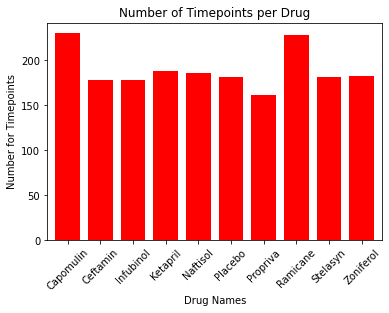

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


pandas_bar= drugs_grouped.count().plot.bar(y="Timepoint", rot="45", width=.75,
                                           title="Number of Timepoints per Drug", legend=False,
                                          xlabel="Drug Names", ylabel="Number for Timepoints", color="red")
print(pandas_bar)

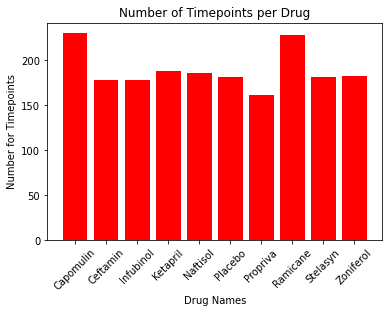

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
x_values= drugs_grouped.count().index
y_values= drugs_grouped["Timepoint"].count()


plt.bar(x_values,y_values, color="red")
plt.xticks(rotation="45")
plt.title("Number of Timepoints per Drug")
plt.xlabel("Drug Names")
plt.ylabel("Number for Timepoints")
plt.show()


<AxesSubplot:>

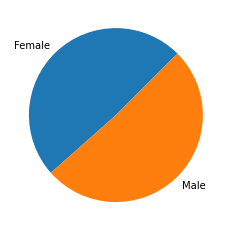

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_grouped= combined_clean.groupby("Sex").count()
sex_grouped.plot.pie(y="Mouse ID", startangle=45, ylabel="",legend=False)

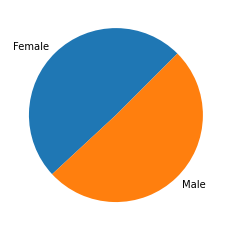

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels= sex_grouped.index.tolist()
plt.pie(sex_grouped["Mouse ID"], startangle=45,labels=labels)

plt.show()


## Quartiles, Outliers and Boxplots

In [179]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
final_volume= pd.DataFrame({"Mouse ID":[],"Tumor Volume (mm3)":[]})
unique_mouse_ID= combined_clean["Mouse ID"].unique()
for ID in unique_mouse_ID:
    max_time= max(combined_clean.loc[combined_clean["Mouse ID"] == ID, "Timepoint"]) 
    final_volume= final_volume.append(combined_clean.loc[(combined_clean["Mouse ID"] == ID) & (combined_clean["Timepoint"] == max_time),
                        ["Mouse ID","Timepoint","Tumor Volume (mm3)"]])
         


final_volume= final_volume.rename(columns={"Tumor Volume (mm3)":"Final Tumor Vol. (mm3)"})

# Merge this group df with the original dataframe get the drug names

drugs_final= pd.merge(final_volume,combined_clean, how="left")
drugs_final.head()



,Mouse ID,Final Tumor Vol. (mm3),Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,22.050126,45.0,Ramicane,Male,21,16,22.050126,1
1,s185,23.343598,45.0,Capomulin,Female,3,17,23.343598,1
2,x401,28.484033,45.0,Capomulin,Female,16,15,28.484033,0
3,m601,28.430964,45.0,Capomulin,Male,22,17,28.430964,1
4,g791,29.128472,45.0,Ramicane,Male,11,16,29.128472,1


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds    
    

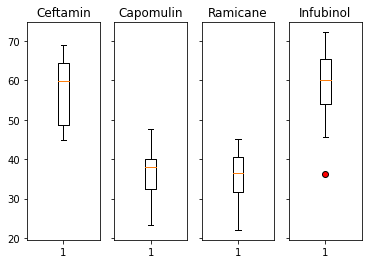

In [178]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, (ax1, ax2, ax3, ax4)= plt.subplots(1,4, sharey=True)

red_circle = {"markerfacecolor":'r', "marker":'o'}

drugs_final_ceftamin= drugs_final.loc[drugs_final["Drug Regimen"] == "Ceftamin",:]
ax1.boxplot(drugs_final_ceftamin['Final Tumor Vol. (mm3)'], flierprops= red_circle)
ax1.set_title("Ceftamin")

drugs_final_capomulin= drugs_final.loc[drugs_final["Drug Regimen"] == "Capomulin",:]
ax2.boxplot(drugs_final_capomulin['Final Tumor Vol. (mm3)'], flierprops= red_circle)
ax2.set_title("Capomulin")

drugs_final_ramicane= drugs_final.loc[drugs_final["Drug Regimen"] == "Ramicane",:]
ax3.boxplot(drugs_final_ramicane['Final Tumor Vol. (mm3)'], flierprops= red_circle)
ax3.set_title("Ramicane")

drugs_final_infubinol= drugs_final.loc[drugs_final["Drug Regimen"] == "Infubinol",:]
ax4.boxplot(drugs_final_infubinol['Final Tumor Vol. (mm3)'], flierprops= red_circle)
ax4.set_title("Infubinol")

plt.show()


## Line and Scatter Plots

In [121]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


mouse_s185= combined_clean.loc[combined_clean["Mouse ID"] == "s185", ["Timepoint","Tumor Volume (mm3)"]]

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


<AxesSubplot:title={'center':'Mouse s185 (Capomulin)'}, xlabel='Timepoint', ylabel='Tumor Volume'>

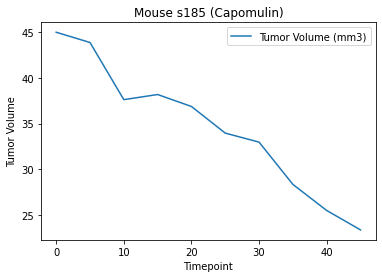

In [124]:
mouse_s185.plot.line(x="Timepoint", y= "Tumor Volume (mm3)", title= "Mouse s185 (Capomulin)", ylabel="Tumor Volume")

<AxesSubplot:title={'center':'Tumor Vol. VS Mouse Weight for Capomulin'}, xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

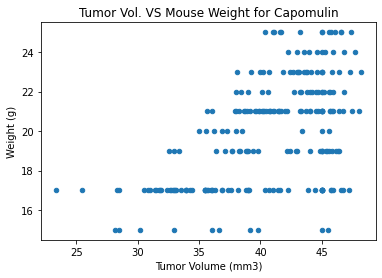

In [135]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

tumor_vs_weight= combined_clean.loc[combined_clean["Drug Regimen"] == "Capomulin", ["Tumor Volume (mm3)","Weight (g)"]]
tumor_vs_weight.plot.scatter(x="Tumor Volume (mm3)",y="Weight (g)", title= "Tumor Vol. VS Mouse Weight for Capomulin" )


## Correlation and Regression

Text(0.5, 1.0, 'Tumor Vol. VS Mouse Weight for Capomulin')

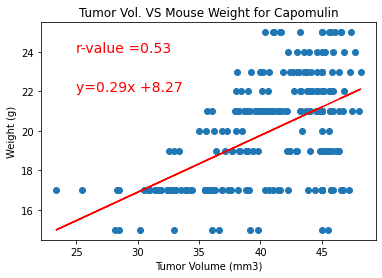

In [174]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values= tumor_vs_weight["Tumor Volume (mm3)"]
y_values= tumor_vs_weight["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_values,y_values)
regression_values= x_values*slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values,regression_values, "r-")
slope= round(slope,2)
intercept= round(intercept,2)
rvalue= round(rvalue,2)
plt.annotate(f"y={slope}x +{intercept}",(25,22), color="red", size=14)
plt.annotate(f"r-value ={rvalue}",(25,24),color="red", size=14)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Tumor Vol. VS Mouse Weight for Capomulin')

